<a href="https://colab.research.google.com/github/michaelojy85/mojy85.github.io/blob/master/Hamoye%20Stage%20B%20Lesson_Machine%20Learning_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import package and that will be used in the entire notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import statsmodels.api as sm

plt.rc('figure', figsize=(20,10)) #to make all my graphs the same size

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# <b>LESSEON #1: Simple Linear Regression</b>


According to the United Nations Environmental Program (UNEP) Sustainable Buildings and Climate Initiative, construction trade contributes as much as 30% to all global greenhouse gas emissions and consumes up to 40% of all energy used worldwide. __[Climate change](https://hamoye.com/app/search/details/Q125928/climate%20change)__ is currently having a powerful impact on how buildings are designed and constructed.

Predicting numeric outcomes with some accuracy measure is an important facet of machine learning and __[data science](https://hamoye.com/app/search/details/Q2374463/data%20science)__. For this part, we will use a case study to understand linear regression and its associated cousins. We will learn about the assumptions behind linear regression, multiple linear regression, partial least squares and penalizations. We’ll also focus on strategies for measuring regression performance and implementations. 

In this module, we will develop a multivariate multiple regression model to study the effect of eight input variables on two output variables, which are the heating load and the cooling load, of residential buildings. The data provided is from the energy analysis data of 768 different building shapes. The features provided are the relative compactness, surface area, wall area, roof area, overall height, orientation, glazing area and glazing area distribution. 

Data Source for content: __[UCI Machine Learning Repository: Energy efficiency Data Set](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency)__ 

Data Quiz: __[UCI Machine Learning Repository: Appliances energy prediction Data Set](https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction)__

##Simple Linear Regression
###<b>The simple linear regression model.</b>

A simple linear regression model estimates the relationship between two quantitative variables where one is referred to as the independent variable and the other the dependent variable. The independent variable $(X)$ is used to predict and also called the predictor while the predicted variable is referred to as the response variable $(Y)$ (e.g. finding the relationship between the amount of $CO_2$ gas emitted and the number of trees cut down). The value of Y can be obtained from X by finding the line of best fit (regression line) with minimum error for the data points on a scatter plot for both variables. A simple linear regression can be represented as:


Where
>y = $\theta_0x$ + $\theta_1$

> $x$ is the independent variable

>$\theta_1$ is the intercept

>$\theta_0$ is the slope of the line of best fit

>$\theta_0$ and $\theta_1$are known as regression coefficients 	
 
__[The UCI Machine Learning Repository: Energy efficiency Data Set](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency)__ is used in this module for better understanding of the concepts. We select a sample of the dataset and use the relative compactness column as the predictor and the heating load column the response variable.

In [2]:
# Loading UCI Machine Learning Repository: Energy efficiency Data Set
df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
# Rename the columns of the dataset
columns_names = {'X1':'Relative_Compactness', 'X2':'Surface_Area', 'X3':'Wall_Area',
                  'X4': 'Roof_Area', 'X5': 'Overall_Height', 'X6': 'Orientation',
                  'X7': 'Glazing_Area', 'X8': 'Glazing_Area_Distribution',
                  'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}  #Y1 and Y2 are the target variables
df = df.rename(columns=columns_names)
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [4]:
# finding the shape of the dataset
df.shape

(768, 10)

In [5]:
# finding the correlation of the dataset
df.corr(method='pearson')

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
Relative_Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.000000,1.283986e-17,1.764620e-17,0.622272,0.634339
Surface_Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.000000,1.318356e-16,-3.558613e-16,-0.658120,-0.672999
Wall_Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.000000,-7.969726e-19,0.000000e+00,0.455671,0.427117
Roof_Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.000000,-1.381805e-16,-1.079129e-16,-0.861828,-0.862547
Overall_Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.000000,1.861418e-18,0.000000e+00,0.889430,0.895785
Orientation,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-0.002587,0.014290
Glazing_Area,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,0.000000,1.000000e+00,2.129642e-01,0.269842,0.207505
Glazing_Area_Distribution,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.000000,2.129642e-01,1.000000e+00,0.087368,0.050525
Heating_Load,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-0.002587,2.698417e-01,8.736846e-02,1.000000,0.975862
Cooling_Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,0.014290,2.075050e-01,5.052512e-02,0.975862,1.000000


In [6]:
x_cols = list(df.columns[0:8])
y1_cols = df.columns[-2] # Heating_Load
y2_cols = df.columns[-1] # Cooling_Load

In [7]:
# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(df[x_cols])

est1 = sm.OLS(df[y1_cols], x).fit()
est2 = sm.OLS(df[y2_cols], x).fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Cooling_Load   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     859.1
Date:                Wed, 29 Jul 2020   Prob (F-statistic):               0.00
Time:                        10:49:02   Log-Likelihood:                -1979.3
No. Observations:                 768   AIC:                             3975.
Df Residuals:                     760   BIC:                             4012.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        97.2457     20.765      4.683      0.000      56.483     138.009
Relative_Compactness        -70.7877     11.225     -6.306      0.000     -92.824     -48.751
Surface_Area                 -0.0661      0.015     -4.519      0.000      -0.095      -0.037
Wall_Area                     0.0225      0.004      5.365      0.000       0.014       0.031
Roof_Area                    -0.0443      0.008     -5.404      0.000      -0.060      -0.028
Overall_Height                4.2838      0.369     11.618      0.000       3.560       5.008
Orientation                   0.1215      0.103      1.176      0.240      -0.081       0.324
Glazing_Area                 14.7171      0.888     16.573      0.000      12.974      16.460
Glazing_Area_Distribution     0.0407      0.076      0.534      0.594      -0.109       0.190
==============================================================================
Omnibus:                      104.668   Durbin-Watson:                   1.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.547
Skew:                           0.767   Prob(JB):                     8.65e-51
Kurtosis:                       5.203   Cond. No.                     1.46e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.14e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [8]:
#select a 15 samples of the dataset to analyse the relationships between Relative_Compactness and Cooling_Load.
simple_linear_reg_df = df[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)

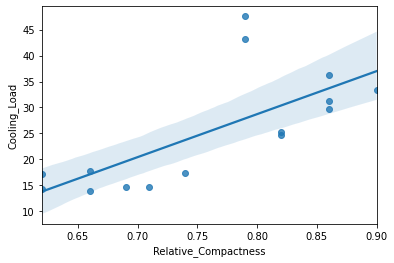

In [9]:
#simple linear regression plot
sns.regplot(x='Relative_Compactness', y='Cooling_Load', data=simple_linear_reg_df)

## Creating dummy dataset

In [10]:
from sklearn.datasets import make_regression

X_dummy,y_dummy = make_regression(n_samples=768, n_features=8, noise=25, n_targets=2, random_state=1)
dummy = pd.DataFrame(np.concatenate((X_dummy,y_dummy), axis=1))
dummy.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.826498,0.336491,0.461829,-0.125212,-0.500479,0.890586,-0.540387,0.856919,7.145854,14.921890
1,-0.259195,0.707294,2.614008,-0.184083,0.007701,-1.719392,0.388814,-0.684141,40.814140,-81.281527
2,0.049922,-0.292579,-0.299095,0.219477,0.815600,-0.282006,0.329490,-1.201156,-23.620922,28.706447
3,-2.277298,0.718291,-0.186955,-0.069625,1.291189,-0.116444,0.385602,0.353870,-25.778455,13.175249
4,-0.576148,0.480226,-0.035256,1.117410,1.039288,1.457876,1.818012,-0.821370,206.880539,272.670609


## Collinearity and Assumptions for Linear Regression


For better understanding, we explain the assumptions made by linear regression by comparing results on our energy efficiency dataset and a dummy linear dataset generated to have similar shape (same number of rows and column) as the energy efficiency dataset. Some assumptions made by linear regression
models about the data are:
1. **Linearity**: the relationship between the variables is linear such that a straight line is the line of best fit from the   regression plots above, we can see that the residuals of the dummy data are spread across the regression line as they should be to meet thelinearity assumption unlike the residuals of the energy efficiency dataset which are a bit farther from the regression line.

In [11]:
# To create a linear regression model using sklearn to train the dataset 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# single variable for simple regression model
X_input = df[['Relative_Compactness']] # features / X-values
y_target = df[['Cooling_Load']] # targets / y-values

In [12]:
# A simple linear regression function that will train the data, displaying regression plot and return y_test and y_pred
def SimpleLinearRegression(features, targets, g_title=None):

    X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.33, random_state=42)

    regressor = LinearRegression()  
    regressor.fit(X_train, y_train)  # fit training data 

    y_pred = regressor.predict(X_test) # predicted y values
    
    ax = sns.regplot(x=y_test,y=y_pred) # regression plot
    ax.set(xlabel='Actual Values', ylabel='Predicted Values') # set x and y label
    ax.set_title(g_title) # set title

    print("Coefficient: {}".format(regressor.coef_)) # Coefficient of regressor model

    print("Residual sum of square: {}".format(r2_score(y_test, y_pred))) # Residual sum of square
    
    return y_test, y_pred

Coefficient: [[57.40754257]]
Residual sum of square: 0.3884706747082636


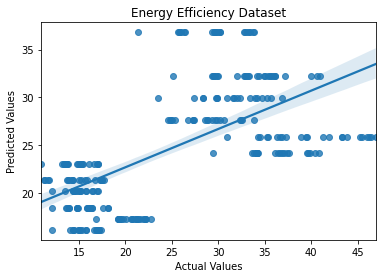

In [13]:
y_test, y_pred = SimpleLinearRegression(X_input, y_target, "Energy Efficiency Dataset")  # actual dataset


Coefficient: [45.71536464 52.28162641 15.47495827 13.29367982 75.48606249 77.77547666
 54.06759732 27.10260204]
Residual sum of square: 0.9665475496997395


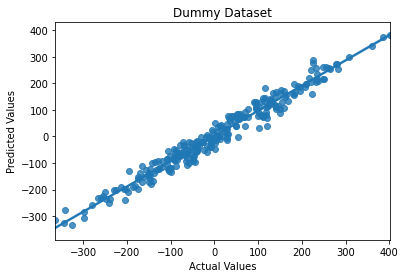

In [14]:
y_dummy_test, y_dummy_pred = SimpleLinearRegression(X_dummy, y_dummy.T[1], "Dummy Dataset") # dummy dataset


2. **Homoscedasticity**: the residuals or prediction errors are of equal or constant variance.  The variance of the residuals for the dummy dataset appear to be uniform as opposed to the energy efficiency dataset which violates this assumption.

Text(0.5, 1.0, 'Energy Efficiency Dataset')

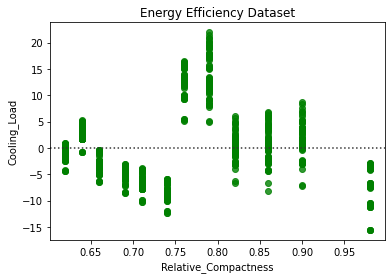

In [15]:
sns.residplot(x=X_input, y=y_target, color="green").set_title("Energy Efficiency Dataset")  # residual plot for actual dataset

In [16]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.93113960757509
Mean Squared Error: 56.455091053788166
Root Mean Squared Error: 7.5136602966721995


Text(0.5, 1.0, 'Dummy Dataset')

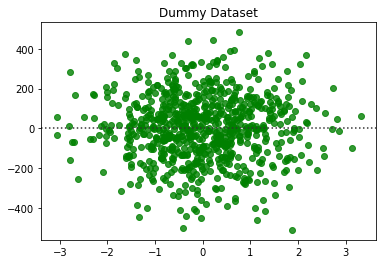

In [17]:
sns.residplot(x=X_dummy.T[0], y=y_dummy.T[0], color="green").set_title("Dummy Dataset") # residual plot for dummy dataset

In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_dummy_test, y_dummy_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_dummy_test, y_dummy_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_dummy_test, y_dummy_pred)))

Mean Absolute Error: 21.718981171450885
Mean Squared Error: 717.2298831511858
Root Mean Squared Error: 26.781147905778532


3. **Normality**: the residuals are of a normal distribution. The energy efficiency dataset flouts this assumption as the residuals are clearly not normally distributed while the dummy dataset has normally distributed residuals with the mean and median at 0.

In [19]:
 def residualDistribution(features, targets, title=None):
    OLS_model = sm.OLS(targets, features).fit()  # training the model
    predicted_values = OLS_model.predict()  # predicted values
    residual_values = OLS_model.resid
    sns.distplot(residual_values.T).set_title(title)

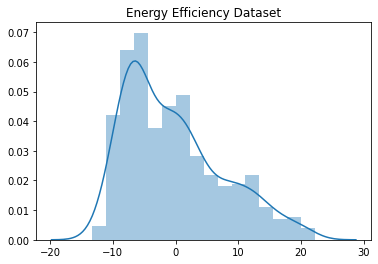

In [20]:
residualDistribution(X_input, y_target, "Energy Efficiency Dataset") # actual dataset

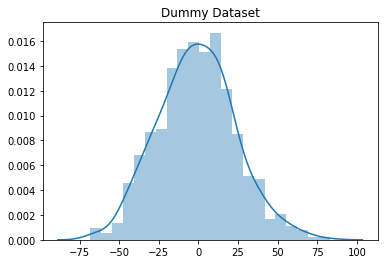

In [21]:
residualDistribution(X_dummy, y_dummy.T[1], "Dummy Dataset") # dummy dataset

4. **Independence of the observations**

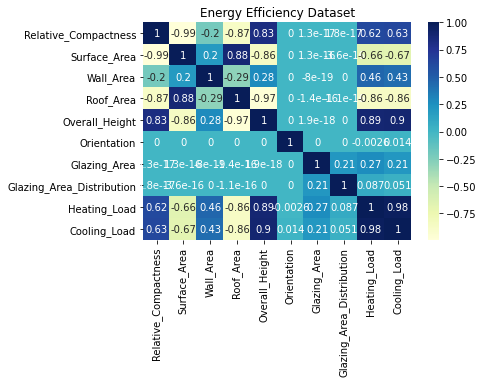

In [22]:
sns.heatmap(df.corr(method='pearson'), annot=True, cmap="YlGnBu").set_title("Energy Efficiency Dataset"); # colleration values (heatmap) of actual dataset

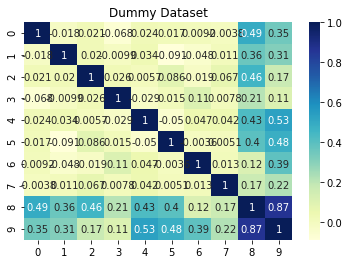

In [23]:
sns.heatmap(dummy.corr(method='pearson'), annot=True, cmap="YlGnBu").set_title("Dummy Dataset"); # colleration values (heatmap) of dummy dataset

# **LESSON #2**: Multiple Linear Regression

Unlike simple linear regression, multiple linear regression establishes the relationship between the response variable and the predictors (usually two or more). In reality, several factors contribute to a certain outcome as opposed to just one as suggested by simple linear regression. Multiple linear regression has similar assumptions as simple linear regression and also assumes that there is no significant correlation between the predictors. While the relationship between variables can be linear, it allows for non-linear relationships that are not straight lines.

Y= $\theta_2$ + $\theta_1X_1$ + $theta_2X_2$ + . . .  +  $\theta_nX_n$ + ɛ

- Coefficients of multiple linear regression

In [24]:
#multi-variables for multiple regression model
all_inputs = df[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution']].values # features/ X-values
all_targets = df[['Heating_Load', 'Cooling_Load']].values # targets / y-values

In [25]:
# A multiple linear regression function that will train the data, displaying regression plot and return y_test and y_pred
def MultipleLinearRegression(features, targets, g_title=None):

    X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.33, random_state=42)

    regressor = LinearRegression()  
    regressor.fit(X_train, y_train)  # fit training data 

    y_pred = regressor.predict(X_test) # predicted y values

    df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    ax = sns.regplot(x='Actual',y='Predicted', data=df_results) # regression plot
    
    ax.set(xlabel='Actual Values', ylabel='Predicted Values') # set x and y label
    ax.set_title(g_title) # set title

    print("Residual sum of square: {}".format(r2_score(y_test, y_pred))) # Residual sum of square
    print("Coefficient: {}".format(regressor.coef_)) #coefficient of the regression model

    return y_test, y_pred

Residual sum of square: 0.9159352998210062
Coefficient: [-6.35206253e+01  7.47003702e+11 -7.47003702e+11 -1.49400740e+12
  4.12199497e+00 -5.06528951e-02  1.97584575e+01  2.52564073e-01]


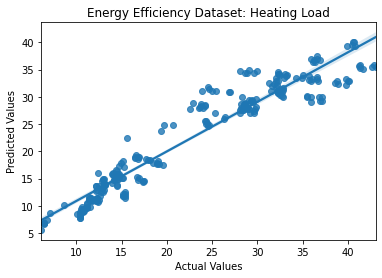

In [26]:
y_test, y_pred = MultipleLinearRegression(all_inputs, all_targets.T[0], "Energy Efficiency Dataset: Heating Load")  # actual dataset

Residual sum of square: 0.8892202230112425
Coefficient: [-7.19948454e+01  5.59645389e+11 -5.59645389e+11 -1.11929078e+12
  4.12489223e+00  8.43455410e-02  1.41479052e+01  6.08676076e-02]


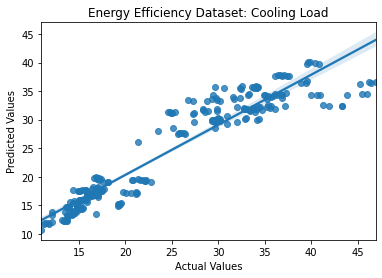

In [27]:
y_test, y_pred = MultipleLinearRegression(all_inputs, all_targets.T[1], "Energy Efficiency Dataset: Cooling Load")  # actual dataset

##Collinearity 

Correlation is a measure used to describe the linear relationship between two variables. Correlation values range from -1 for a perfect negative correlation (an increase in one variable causes a decrease in the other variable) to +1 for a perfect positive correlation (both variables increase or decrease together). A correlation value of 0 indicates that there is absolutely no correlation between both variables. A situation where two or more of the predictors have a strong correlation is known as multicollinearity. Since predictors are expected to be independent, when multicollinearity occurs, the correlated variables cannot independently contribute to predicting the value of the response variable. In addition, not all the predictors included are relevant in obtaining better results from the model. Adding more independent variables to the model is not always better instead, it might only make the model more complicated. To resolve this, one of the correlated predictors is selected and the other removed from the data.

In [129]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor

def RecursiveFeatureElimination(cols_x, cols_y):
  #Feature Selection for Cooling Load
  model = ExtraTreesRegressor(criterion='mae')
  rfe = RFE(model, 4)
  fit = rfe.fit(df[cols_x], df[cols_y])

  cols = []

  for boolean, col in zip(fit.support_, cols_x):
      if boolean:
          cols.append(col)

  print("Number of Features: ", fit.n_features_)
  print("Selected Features: ", fit.support_)
  print("Feature Ranking: ", fit.ranking_) 
  print("Selected Feature: ", cols)

  return cols

In [141]:
x_cool_cols = RecursiveFeatureElimination(x_cols, y2_cols)

Number of Features:  4
Selected Features:  [False False  True  True  True False  True False]
Feature Ranking:  [2 3 1 1 1 5 1 4]
Selected Feature:  ['Wall_Area', 'Roof_Area', 'Overall_Height', 'Glazing_Area']


In [142]:
x_heat_cols = RecursiveFeatureElimination(x_cols, y1_cols)

Number of Features:  4
Selected Features:  [ True False  True False  True False  True False]
Feature Ranking:  [1 3 1 2 1 5 1 4]
Selected Feature:  ['Relative_Compactness', 'Wall_Area', 'Overall_Height', 'Glazing_Area']


Residual sum of square: 0.884128024426947
Coefficient: [ 0.04236362  0.04170295  5.59755842 14.64125964]


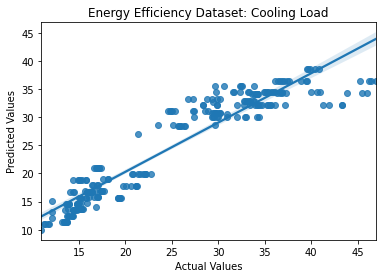

In [143]:
x_cool_feature = df[x_cool_cols].values
x_cool_target = df[y2_cols].values

y_test, y_pred = MultipleLinearRegression(x_cool_feature, x_cool_target, "Energy Efficiency Dataset: Cooling Load")  # actual dataset

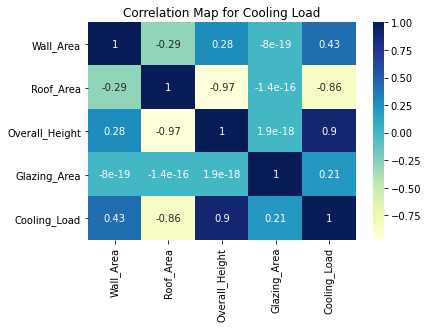

In [144]:
x_cool_cols.append(y2_cols)
sns.heatmap(df[x_cool_cols].corr(method='pearson'), annot=True, cmap="YlGnBu").set_title("Correlation Map for Cooling Load"); # colleration values (heatmap) of actual dataset

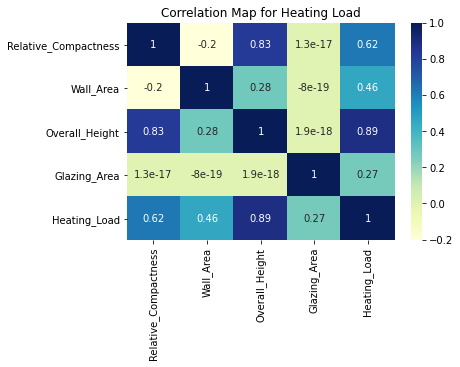

In [145]:
x_heat_cols.append(y1_cols)
sns.heatmap(df[x_heat_cols].corr(method='pearson'), annot=True, cmap="YlGnBu").set_title("Correlation Map for Heating Load"); # colleration values (heatmap) of actual dataset

Residual sum of square: 0.983103298104245
Coefficient: [88.19176097 75.33441625 73.57429473 45.36639703 79.15392389 77.63619339
 17.84951364 23.17141298]


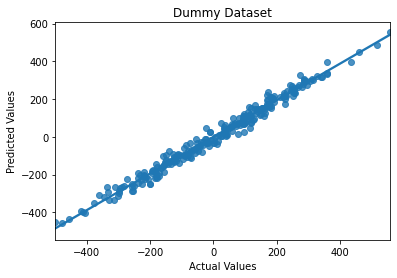

In [140]:
y_test, y_pred = MultipleLinearRegression(X_dummy, y_dummy.T[0], "Dummy Dataset")  # dummy dataset

Residual sum of square: 0.9665475496997395
Coefficient: [45.71536464 52.28162641 15.47495827 13.29367982 75.48606249 77.77547666
 54.06759732 27.10260204]


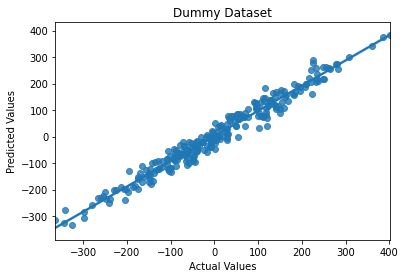

In [32]:
y_test, y_pred = MultipleLinearRegression(X_dummy, y_dummy.T[1], "Dummy Dataset")  # dummy dataset

In [ ]:
residualDistribution(all_inputs, all_targets, "Energy Efficiency Dataset") # actual dataset

In [ ]:
residualDistribution(X_dummy, y_dummy, "Dummy Dataset") # dummy dataset

## Polynomial Regression

A polynomial regression model is considered a linear regression model that can be used when a curvilinear relationship exists between the predictors and the response variable. It can be represented as $Y$ = $\theta_0$ + $\theta_1X$ + $\theta_2X_2$ + . . .  +  $\theta_nX_n$ + ɛ, for a single independent variable where $n$ is the degree of the polynomial and Y is a linear function of $\theta$. Depending on the task and data, there might be multiple predictors in a polynomial regression model which results in more interactions in the model. As expected, the complexity in the model increases as the degree increases.


In [105]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm
from sklearn.preprocessing import StandardScaler


def TrainModel(features, targets, normalize=False):
    if normalize:
      scaler = StandardScaler()
      X_ = scaler.fit_transform(features)
    else:
      X_ = features

    return train_test_split(X_, targets, test_size=0.33, random_state=42)

In [106]:
# A polynomial regression function that will generate the SVR score and plot a regression plot
def PolynomialRegression(features, targets, deg=1, reg=1, g_title=None):

    X_train, X_test, y_train, y_test = TrainModel(features, targets)

    svr_score = 0 

    for i in range(1, deg,1):
      for j in range (1, reg,1):
          svm_poly_clf = svm.SVR(kernel='poly', degree=i, C=j).fit(X_train, y_train)
          score = svm_poly_clf.score(X_test, y_test)

          if svr_score < score:
            svr_score, d, r = score, i, j

    y_pred = svm_poly_clf.predict(X_test) # predicted y values

    df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

    ax = sns.regplot(x='Actual',y='Predicted', data=df_results, order=d) # regression plot
    
    ax.set(xlabel='Actual Values', ylabel='Predicted Values') # set x and y label
    ax.set_title(g_title) # set title

    print("Polynomial Degree: {}".format(d))
    print("Reguralizatin (C): {}".format(r))
    print("SVR Score: {}".format(svr_score))

    #return y_test, y_pred

Polynomial Degree: 7
Reguralizatin (C): 19
SVR Score: 0.8319172019412236


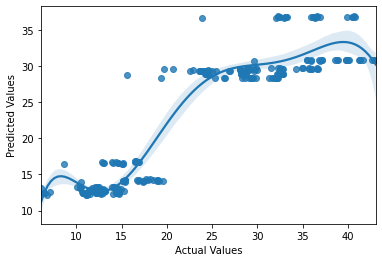

In [107]:
PolynomialRegression(all_inputs, all_targets.T[0], deg=8, reg=20)

Polynomial Degree: 7
Reguralizatin (C): 19
SVR Score: 0.8180395521169082


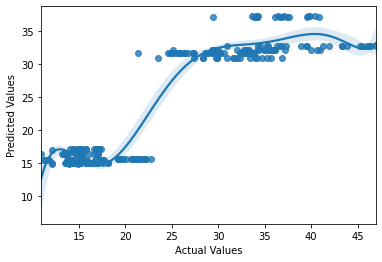

In [108]:
PolynomialRegression(all_inputs, all_targets.T[1], deg=8, reg=20)

# **LESSON #3**: Measuring Regression Performance

###Evaluation Metrics for performance (RSS, R-Squared, RMSE, MAE etc)
How well a regression model performs can be obtained by how close the predicted value is to the ground truth. It is very important to use the appropriate metric to evaluate the performance. In this section, we discuss some examples of metrics used in evaluating regression models such as RSS, R-Squared, RMSE and MAE

In [177]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler

minMax = MinMaxScaler()
normalised_df = pd.DataFrame(minMax.fit_transform(df), columns=df.columns)
feature_df = normalised_df.drop(columns=['Heating_Load','Cooling_Load'])
heating_target = normalised_df.Heating_Load

var_train, var_test, res_train, res_test = train_test_split(feature_df, heating_target, test_size=0.3, random_state=1)

regr = LinearRegression()  
regr.fit(var_train, res_train)  # fit training data 

predicted_heat_values = regr.predict(var_test)


###**Mean Absolute Error (MAE)**

MAE  is easy and intuitive such that it calculates the sum of the  average of the absolute error between the predicted values and the true values. Since the absolute difference is taken, this metric does not consider direction. However, because the absolute difference is obtained, it is unable to give information about the model overshooting or undershooting. The smaller the MAE is, the better the model. Therefore, if the MAE is 0, the model is perfect and accurately predicts results which is almost impossible.  The mean absolute error is more robust to outliers



#<center>$^1/_n$$\sum_{i}|$y<sub>i</sub>- $\hat{y}$<sub>i</sub>|</center>

######where y<sub>i</sub> = true value

######$\hat{y}$<sub>i</sub> = predicted value

###**Residual Sum of Squares (RSS)**

Also known as the sum of squared residuals (SSR), this metric explains the variance in the representation of the dataset by the model; it measures how well the model approximates the data. A residual is the estimated error made by a model. In simpler terms, it is the difference between the nth true value and the nth predicted value by the model. RSS is the sum of the square of errors between the residuals in a model. The lower the RSS, the better the model’s estimations and vice versa.

\begin{array}{rrl}
\text{Residual sum of Squares (RSS)} & = & \sum_{i=1}^{\href{sample_size}{N}}(\href{residual}{residual})^2 \\
RSS & = & \sum_{i=1}^{\href{sample_size}{N}}(\href{residual}{e_i})^2 \\
RSS & = & \sum_{i=1}^{\href{sample_size}{N}}(Y_i-\hat{Y_i})^2 \\
\end{array}

###**Root Mean Square Error (RMSE)**

This is the same as the mean square error (MSE) but, it is the square root of the MSE that estimates the standard deviation of the residuals. It describes the spread of the residuals from the line of best fit and the noise in the model. When the RMSE is low, it means that the error made by the model has a small deviation from the true values. It is calculated by summing the squares of the residuals and dividing by the number of observations.

\begin{array}{rrl}
 $\text{Root mean squared error (RMSE|RMSD)}= \sqrt{\frac{\displaystyle \sum_{i=1}^N (Y_i-\hat{Y_i})^2}{N}}$
\end{array}

###**R-Squared**

Also known as the coefficient of determination, r-squared is a metric used in regression to determine the goodness of fit of the model. With values ranging from 0 to 1, It gives information on the percentage of the response variable  explained by the model. Mostly, the higher the value, the better the model however, this is not necessarily always true.

\begin{array}{rrl}
R^2 & = & 1 - \frac{\href{RSS}{RSS}}{TSS} \\
TSS & = & \sum^N_{i=0} (y_i - \bar{y})^2 \\
RSS & = & \sum_{i=1}^{\href{sample_size}{N}}(Y_i-\hat{Y_i})^2 \\
\end{array}

###### where SS<sub>res</sub> = residual sum of squares =RSS
###### SS<sub>tot</sub> = Total sum of squares= TSS
###### $\bar{y}$ = mean of the observed data

In [178]:
n = 3  # round up in n decimal digits
yt=np.array(res_test)
pv= np.array(predicted_heat_values)

mae = round(metrics.mean_absolute_error(res_test, predicted_heat_values), n)   # Mean Absolute Error
rss = round(np.sum(np.square(yt - pv)), n)   # Residual Sum of Squares
mse = round(metrics.mean_squared_error(res_test, predicted_heat_values), n)   # Mean Squared Error
rmse = round(np.sqrt(metrics.mean_squared_error(res_test, predicted_heat_values)), n)   # Root Mean Squared Error
r2score = round(r2_score(res_test, predicted_heat_values), n)   # R-Squared 

In [179]:
print('Mean Absolute Error    :', mae)
print('Residual Sum of Squares:', rss)  
print('Mean Squared Error     :', mse)  
print('Root Mean Squared Error:', rmse)
print('R-Squared              :', r2score)

Mean Absolute Error    : 0.063
Residual Sum of Squares: 1.823
Mean Squared Error     : 0.008
Root Mean Squared Error: 0.089
R-Squared              : 0.893
